In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Installation et import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliothèques chargées avec succès!")
print("Vous pouvez passer à l'étape suivante.")

✅ Bibliothèques chargées avec succès!
Vous pouvez passer à l'étape suivante.


In [3]:
# Upload du fichier CSV des loyers
print("📁 Cliquez sur 'Choisir les fichiers' et sélectionnez votre fichier CSV")
uploaded = files.upload()

# Récupération du nom du fichier
filename = list(uploaded.keys())[0]
print(f"\n✅ Fichier '{filename}' uploadé avec succès!")

📁 Cliquez sur 'Choisir les fichiers' et sélectionnez votre fichier CSV


Saving logement-encadrement-des-loyers.csv to logement-encadrement-des-loyers.csv

✅ Fichier 'logement-encadrement-des-loyers.csv' uploadé avec succès!


In [4]:
# Chargement du fichier dans un DataFrame
# Essayons différents séparateurs au cas où
try:
    df = pd.read_csv(filename, sep=';', encoding='utf-8')
except:
    try:
        df = pd.read_csv(filename, sep=',', encoding='utf-8')
    except:
        df = pd.read_csv(filename, sep=';', encoding='latin-1')

print("📊 APERÇU DE VOS DONNÉES")
print("="*70)
print(f"\nNombre de lignes : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"\n📋 Colonnes disponibles :")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print(f"\n🔍 Aperçu des 5 premières lignes :")
print(df.head())

print(f"\n📈 Informations sur les colonnes :")
print(df.info())

print(f"\n📊 Statistiques descriptives :")
print(df.describe())

📊 APERÇU DE VOS DONNÉES

Nombre de lignes : 17920
Nombre de colonnes : 14

📋 Colonnes disponibles :
   1. Année
   2. Secteurs géographiques
   3. Numéro du quartier
   4. Nom du quartier
   5. Nombre de pièces principales
   6. Epoque de construction
   7. Type de location
   8. Loyers de référence
   9. Loyers de référence majorés
   10. Loyers de référence minorés
   11. Ville
   12. Numéro INSEE du quartier
   13. geo_shape
   14. geo_point_2d

🔍 Aperçu des 5 premières lignes :
   Année  Secteurs géographiques  Numéro du quartier        Nom du quartier  \
0   2024                      11                  39     Porte-Saint-Martin   
1   2024                      14                  47                  Bercy   
2   2025                       2                  34       Chaussée-d'Antin   
3   2025                       1                  23  Notre-Dame-des-Champs   
4   2023                       3                  62                 Muette   

   Nombre de pièces principales Epoque

In [5]:
print("Colonnes :", df.columns.tolist())
print("\n5 premières lignes :")
print(df.head())


Colonnes : ['Année', 'Secteurs géographiques', 'Numéro du quartier', 'Nom du quartier', 'Nombre de pièces principales', 'Epoque de construction', 'Type de location', 'Loyers de référence', 'Loyers de référence majorés', 'Loyers de référence minorés', 'Ville', 'Numéro INSEE du quartier', 'geo_shape', 'geo_point_2d']

5 premières lignes :
   Année  Secteurs géographiques  Numéro du quartier        Nom du quartier  \
0   2024                      11                  39     Porte-Saint-Martin   
1   2024                      14                  47                  Bercy   
2   2025                       2                  34       Chaussée-d'Antin   
3   2025                       1                  23  Notre-Dame-des-Champs   
4   2023                       3                  62                 Muette   

   Nombre de pièces principales Epoque de construction Type de location  \
0                             3             Apres 1990           meublé   
1                             1     

In [7]:
print("Colonnes :", df.columns.tolist())
print("\n5 premières lignes :")
print(df.head())

Colonnes : ['Année', 'Secteurs géographiques', 'Numéro du quartier', 'Nom du quartier', 'Nombre de pièces principales', 'Epoque de construction', 'Type de location', 'Loyers de référence', 'Loyers de référence majorés', 'Loyers de référence minorés', 'Ville', 'Numéro INSEE du quartier', 'geo_shape', 'geo_point_2d']

5 premières lignes :
   Année  Secteurs géographiques  Numéro du quartier        Nom du quartier  \
0   2024                      11                  39     Porte-Saint-Martin   
1   2024                      14                  47                  Bercy   
2   2025                       2                  34       Chaussée-d'Antin   
3   2025                       1                  23  Notre-Dame-des-Champs   
4   2023                       3                  62                 Muette   

   Nombre de pièces principales Epoque de construction Type de location  \
0                             3             Apres 1990           meublé   
1                             1     

In [8]:
# ============================================
# PRÉPARATION DES DONNÉES
# ============================================

print("🔧 PRÉPARATION DES DONNÉES")
print("="*70)

# 1. Filtrer uniquement Paris et l'année la plus récente
df_filtered = df[df['Ville'] == 'PARIS'].copy()
annee_max = df_filtered['Année'].max()
df_filtered = df_filtered[df_filtered['Année'] == annee_max]

print(f"✅ Données filtrées : année {annee_max}, ville PARIS")
print(f"   Nombre de lignes : {len(df_filtered)}")

# 2. Nettoyer les données
# Supprimer les lignes avec des loyers manquants
df_filtered = df_filtered.dropna(subset=['Loyers de référence'])

# Convertir en numérique
df_filtered['Loyer_m2'] = pd.to_numeric(df_filtered['Loyers de référence'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Loyer_m2'])

print(f"✅ Données nettoyées : {len(df_filtered)} lignes conservées")

# 3. Afficher un aperçu
print("\n🔍 Aperçu des données nettoyées :")
print(df_filtered[['Nom du quartier', 'Secteurs géographiques', 'Nombre de pièces principales',
                    'Type de location', 'Loyer_m2']].head(10))

# 4. Informations sur les types de logements disponibles
print("\n📊 Types de logements disponibles :")
print(df_filtered['Nombre de pièces principales'].value_counts().sort_index())

print("\n📊 Types de location :")
print(df_filtered['Type de location'].value_counts())

🔧 PRÉPARATION DES DONNÉES
✅ Données filtrées : année 2025, ville PARIS
   Nombre de lignes : 2560
✅ Données nettoyées : 2560 lignes conservées

🔍 Aperçu des données nettoyées :
           Nom du quartier  Secteurs géographiques  \
2         Chaussée-d'Antin                       2   
3    Notre-Dame-des-Champs                       1   
10            Gros-Caillou                       1   
53                Sorbonne                       4   
83                    Mail                       4   
104  Saint-Vincent-de-Paul                       5   
105                 Combat                      14   
106                Gaillon                       2   
107                 Europe                       3   
158                   Gare                      13   

     Nombre de pièces principales Type de location  Loyer_m2  
2                               2       non meublé      28.5  
3                               3       non meublé      30.2  
10                              1      

In [10]:
# ============================================
# PROJET COMPLET : ANALYSE BUDGET PARIS T2/T3
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("="*80)
print("🏠 ANALYSE BUDGET : T2 et T3 NON MEUBLÉS À PARIS")
print("="*80)

# ============================================
# 1. PRÉPARATION DES DONNÉES
# ============================================
print("\n🔧 ÉTAPE 1 : Préparation des données")
print("-"*80)

# Filtrer Paris et année la plus récente
df_filtered = df[df['Ville'] == 'PARIS'].copy()
annee_max = df_filtered['Année'].max()
df_filtered = df_filtered[df_filtered['Année'] == annee_max]

print(f"✅ Données filtrées : année {annee_max}, Paris uniquement")
print(f"   Lignes totales : {len(df_filtered)}")

# Nettoyer les données
df_filtered = df_filtered.dropna(subset=['Loyers de référence'])
df_filtered['Loyer_m2'] = pd.to_numeric(df_filtered['Loyers de référence'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Loyer_m2'])

# FILTRER UNIQUEMENT T2 et T3 NON MEUBLÉS
df_t2_t3 = df_filtered[
    (df_filtered['Nombre de pièces principales'].isin([2, 3])) &
    (df_filtered['Type de location'] == 'non meublé')
].copy()

print(f"✅ Filtré : T2 et T3 non meublés uniquement")
print(f"   Lignes conservées : {len(df_t2_t3)}")

# ============================================
# 2. VOS PARAMÈTRES PERSONNELS
# ============================================
print("\n" + "="*80)
print("💰 ÉTAPE 2 : Configuration de votre budget")
print("-"*80)

# REVENUS
SALAIRE_NET_MENSUEL = 2500

# DÉPENSES FIXES (hors loyer)
NAVIGO_REDUIT_75 = 22.80
BUDGET_NOURRITURE = 300
ELECTRICITE = 60
INTERNET = 30
ASSURANCE_HABITATION = 15
TELEPHONE = 20

DEPENSES_FIXES_HORS_LOYER = (
    NAVIGO_REDUIT_75 + BUDGET_NOURRITURE + ELECTRICITE +
    INTERNET + ASSURANCE_HABITATION + TELEPHONE
)

print(f"💵 Salaire net mensuel : {SALAIRE_NET_MENSUEL:>10.2f} €")
print(f"🧾 Dépenses fixes (hors loyer) : {DEPENSES_FIXES_HORS_LOYER:>10.2f} €")
print(f"💡 Reste pour loyer + vie : {SALAIRE_NET_MENSUEL - DEPENSES_FIXES_HORS_LOYER:>10.2f} €")

# ============================================
# 3. ESTIMATION DES SURFACES ET LOYERS TOTAUX
# ============================================
print("\n" + "="*80)
print("📐 ÉTAPE 3 : Calcul des loyers totaux")
print("-"*80)

# Surfaces moyennes réalistes à Paris
SURFACE_T2 = 40  # m²
SURFACE_T3 = 55  # m²

def calculer_surface(nb_pieces):
    """Retourne la surface moyenne selon le nombre de pièces"""
    if nb_pieces == 2:
        return SURFACE_T2
    elif nb_pieces == 3:
        return SURFACE_T3
    return 40

# Calculs
df_t2_t3['Surface_Estimee'] = df_t2_t3['Nombre de pièces principales'].apply(calculer_surface)
df_t2_t3['Loyer_Hors_Charges'] = df_t2_t3['Loyer_m2'] * df_t2_t3['Surface_Estimee']
df_t2_t3['Charges_Estimees'] = df_t2_t3['Loyer_Hors_Charges'] * 0.15  # 15% de charges
df_t2_t3['Loyer_Charges_Inclus'] = df_t2_t3['Loyer_Hors_Charges'] + df_t2_t3['Charges_Estimees']

print(f"✅ Surfaces estimées : T2 = {SURFACE_T2}m², T3 = {SURFACE_T3}m²")

🏠 ANALYSE BUDGET : T2 et T3 NON MEUBLÉS À PARIS

🔧 ÉTAPE 1 : Préparation des données
--------------------------------------------------------------------------------
✅ Données filtrées : année 2025, Paris uniquement
   Lignes totales : 2560
✅ Filtré : T2 et T3 non meublés uniquement
   Lignes conservées : 640

💰 ÉTAPE 2 : Configuration de votre budget
--------------------------------------------------------------------------------
💵 Salaire net mensuel :    2500.00 €
🧾 Dépenses fixes (hors loyer) :     447.80 €
💡 Reste pour loyer + vie :    2052.20 €

📐 ÉTAPE 3 : Calcul des loyers totaux
--------------------------------------------------------------------------------
✅ Surfaces estimées : T2 = 40m², T3 = 55m²


🏠 ANALYSE BUDGET COMPLÈTE : T2 et T3 NON MEUBLÉS À PARIS
   Incluant : Nourriture, Hygiène, Entretien, Vacances

🔧 ÉTAPE 1 : Préparation des données
--------------------------------------------------------------------------------
✅ Données filtrées : année 2025, Paris uniquement
✅ Filtré : 640 quartiers avec T2/T3 non meublés

💰 ÉTAPE 2 : Configuration détaillée de votre budget

💵 SALAIRE NET MENSUEL : 2500.00 €

🍽️ ALIMENTATION (dépenses mensuelles)
--------------------------------------------------------------------------------
  • Courses supermarché        :   200.00 €
  • Boulangerie                :    30.00 €
  • Restaurants/Fast-food      :    80.00 €
  • Cafés & snacks             :    40.00 €
  --------------------------------------------------
  TOTAL ALIMENTATION           :   350.00 €

🧴 HYGIÈNE & SANTÉ (dépenses mensuelles)
--------------------------------------------------------------------------------
  • Produits d'hygiène         :    25.00 €
  • Coiffeur             

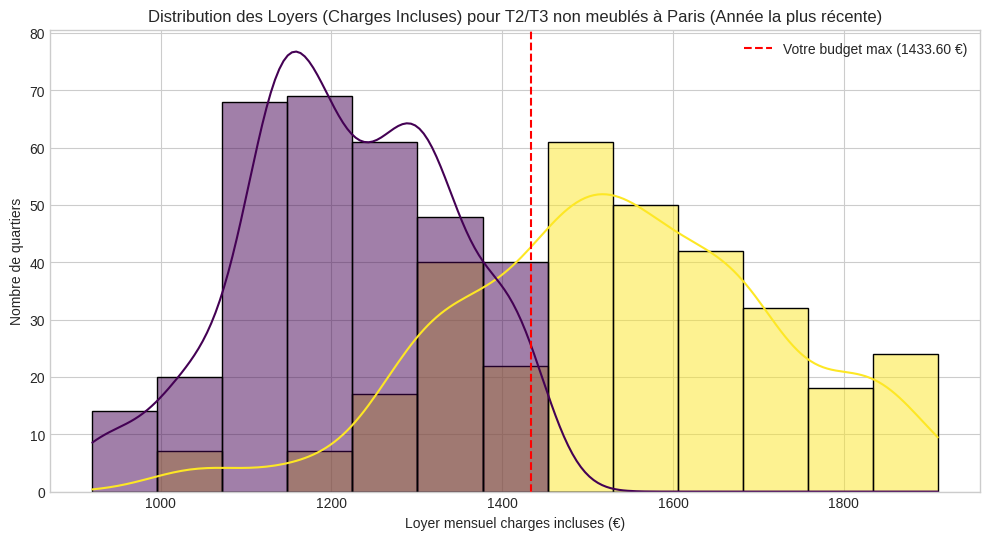

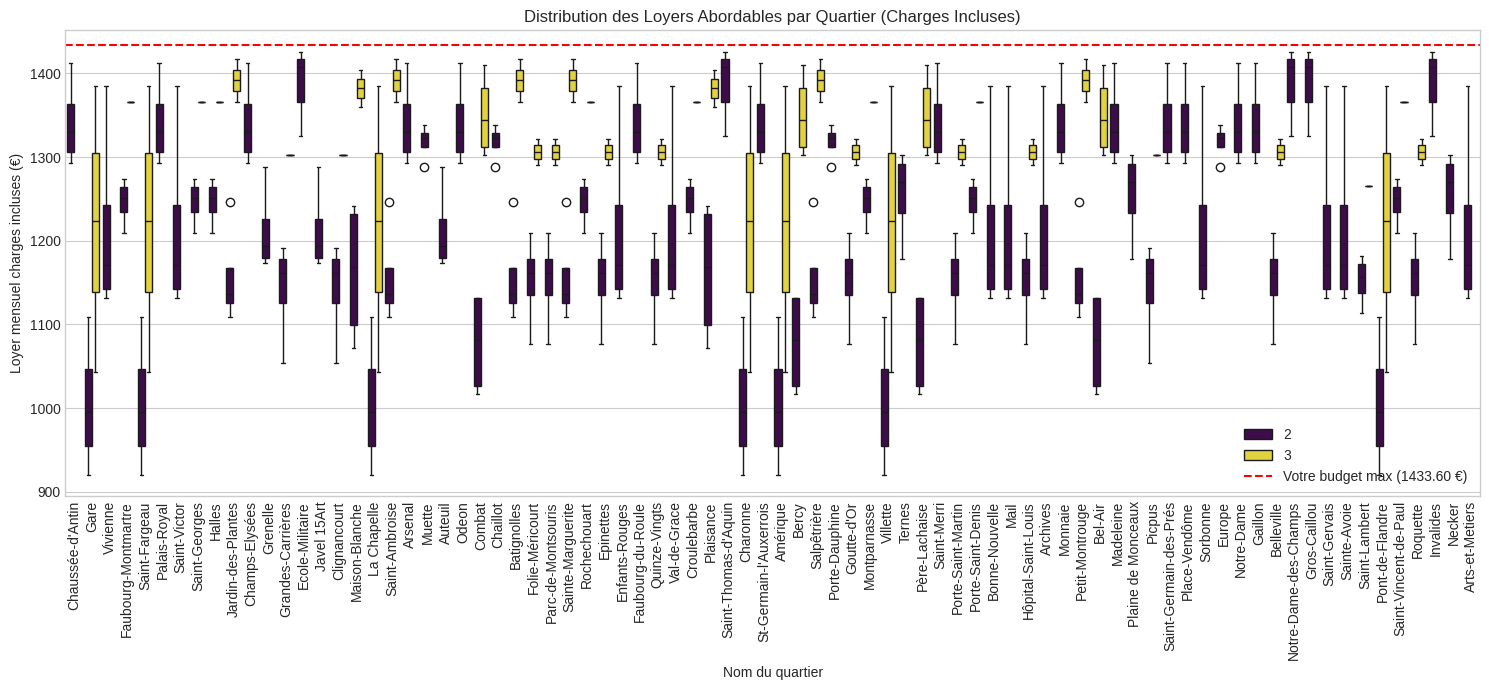

In [12]:
# ============================================
# PROJET COMPLET : ANALYSE BUDGET PARIS T2/T3
# VERSION COMPLÈTE AVEC TOUTES LES DÉPENSES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("="*80)
print("🏠 ANALYSE BUDGET COMPLÈTE : T2 et T3 NON MEUBLÉS À PARIS")
print("   Incluant : Nourriture, Hygiène, Entretien, Vacances")
print("="*80)

# ============================================
# 1. PRÉPARATION DES DONNÉES
# ============================================
print("\n🔧 ÉTAPE 1 : Préparation des données")
print("-"*80)

df_filtered = df[df['Ville'] == 'PARIS'].copy()
annee_max = df_filtered['Année'].max()
df_filtered = df_filtered[df_filtered['Année'] == annee_max]

print(f"✅ Données filtrées : année {annee_max}, Paris uniquement")

df_filtered = df_filtered.dropna(subset=['Loyers de référence'])
df_filtered['Loyer_m2'] = pd.to_numeric(df_filtered['Loyers de référence'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['Loyer_m2'])

df_t2_t3 = df_filtered[
    (df_filtered['Nombre de pièces principales'].isin([2, 3])) &
    (df_filtered['Type de location'] == 'non meublé')
].copy()

print(f"✅ Filtré : {len(df_t2_t3)} quartiers avec T2/T3 non meublés")

# ============================================
# 2. VOS PARAMÈTRES PERSONNELS - VERSION DÉTAILLÉE
# ============================================
print("\n" + "="*80)
print("💰 ÉTAPE 2 : Configuration détaillée de votre budget")
print("="*80)

# ---- REVENUS ----
SALAIRE_NET_MENSUEL = 2500

print(f"\n💵 SALAIRE NET MENSUEL : {SALAIRE_NET_MENSUEL:.2f} €")
print("="*80)

# ---- ALIMENTATION ----
print("\n🍽️ ALIMENTATION (dépenses mensuelles)")
print("-"*80)
COURSES_SUPERMARCHE = 200    # Courses alimentaires de base
BOULANGERIE = 30              # Pain, viennoiseries
RESTAURANTS = 80              # Restaurants, fast-food (2 fois/mois)
CAFE_SNACKS = 40              # Cafés, petits snacks

TOTAL_ALIMENTATION = COURSES_SUPERMARCHE + BOULANGERIE + RESTAURANTS + CAFE_SNACKS

print(f"  • Courses supermarché        : {COURSES_SUPERMARCHE:>8.2f} €")
print(f"  • Boulangerie                : {BOULANGERIE:>8.2f} €")
print(f"  • Restaurants/Fast-food      : {RESTAURANTS:>8.2f} €")
print(f"  • Cafés & snacks             : {CAFE_SNACKS:>8.2f} €")
print(f"  {'-'*50}")
print(f"  TOTAL ALIMENTATION           : {TOTAL_ALIMENTATION:>8.2f} €")

# ---- HYGIÈNE & SANTÉ ----
print("\n🧴 HYGIÈNE & SANTÉ (dépenses mensuelles)")
print("-"*80)
PRODUITS_HYGIENE = 25         # Gel douche, shampoing, déo, dentifrice, etc.
COIFFEUR = 20                 # Coiffeur (moyenne mensuelle)
PHARMACIE_SANTE = 15          # Médicaments, parapharmacie
MUTUELLE = 50                 # Complémentaire santé (si non prise en charge)

TOTAL_HYGIENE_SANTE = PRODUITS_HYGIENE + COIFFEUR + PHARMACIE_SANTE + MUTUELLE

print(f"  • Produits d'hygiène         : {PRODUITS_HYGIENE:>8.2f} €")
print(f"  • Coiffeur                   : {COIFFEUR:>8.2f} €")
print(f"  • Pharmacie & Santé          : {PHARMACIE_SANTE:>8.2f} €")
print(f"  • Mutuelle (si non prise en charge) : {MUTUELLE:>8.2f} €")
print(f"  {'-'*50}")
print(f"  TOTAL HYGIÈNE & SANTÉ        : {TOTAL_HYGIENE_SANTE:>8.2f} €")

# ---- TRANSPORT ----
print("\n🚆 TRANSPORT (dépenses mensuelles)")
print("-"*80)
NAVIGO_FULL_ZONE = 86.40      # Pass Navigo toutes zones
UBER_TAXI = 30                # Occasionnel

TOTAL_TRANSPORT = NAVIGO_FULL_ZONE + UBER_TAXI

print(f"  • Pass Navigo (toutes zones) : {NAVIGO_FULL_ZONE:>8.2f} €")
print(f"  • Uber/Taxi (occasionnel)    : {UBER_TAXI:>8.2f} €")
print(f"  {'-'*50}")
print(f"  TOTAL TRANSPORT              : {TOTAL_TRANSPORT:>8.2f} €")

# ---- LOGEMENT (hors loyer) ----
print("\n🏠 LOGEMENT (hors loyer, dépenses mensuelles)")
print("-"*80)
ELECTRICITE_GAZ = 70          # Électricité et gaz (estimation)
INTERNET_TELEPHONE = 50       # Box internet et forfait mobile
ASSURANCE_HABITATION = 20     # Assurance habitation (estimation)
TAXE_HABITATION = 10          # Taxe d'habitation (moyenne mensuelle)

TOTAL_LOGEMENT_HORS_LOYER = ELECTRICITE_GAZ + INTERNET_TELEPHONE + ASSURANCE_HABITATION + TAXE_HABITATION

print(f"  • Électricité & Gaz          : {ELECTRICITE_GAZ:>8.2f} €")
print(f"  • Internet & Téléphone       : {INTERNET_TELEPHONE:>8.2f} €")
print(f"  • Assurance Habitation       : {ASSURANCE_HABITATION:>8.2f} €")
print(f"  • Taxe d'Habitation          : {TAXE_HABITATION:>8.2f} €")
print(f"  {'-'*50}")
print(f"  TOTAL LOGEMENT (hors loyer)  : {TOTAL_LOGEMENT_HORS_LOYER:>8.2f} €")

# ---- LOISIRS & SORTIES ----
print("\n🎉 LOISIRS & SORTIES (dépenses mensuelles)")
print("-"*80)
ABONNEMENTS_STREAMING = 20    # Netflix, Spotify, etc.
SORTIES_BARS_CONCERTS = 50    # Sorties, bars, concerts
SPORTS_HOBBIES = 40           # Salle de sport, activités
SHOPPING_VETEMENTS = 50       # Vêtements, chaussures, accessoires

TOTAL_LOISIRS_SORTIES = ABONNEMENTS_STREAMING + SORTIES_BARS_CONCERTS + SPORTS_HOBBIES + SHOPPING_VETEMENTS

print(f"  • Abonnements streaming      : {ABONNEMENTS_STREAMING:>8.2f} €")
print(f"  • Sorties, bars, concerts    : {SORTIES_BARS_CONCERTS:>8.2f} €")
print(f"  • Sports & Hobbies           : {SPORTS_HOBBIES:>8.2f} €")
print(f"  • Shopping (vêtements, etc.) : {SHOPPING_VETEMENTS:>8.2f} €")
print(f"  {'-'*50}")
print(f"  TOTAL LOISIRS & SORTIES      : {TOTAL_LOISIRS_SORTIES:>8.2f} €")

# ---- AUTRES DÉPENSES ----
print("\n📦 AUTRES DÉPENSES (dépenses mensuelles)")
print("-"*80)
EPARGNE = 100                 # Épargne (objectif)
VACANCES_ANCIENNETE = 50      # Budget vacances (mis de côté chaque mois)
AUTRES_IMPREVUS = 30          # Divers, imprévus

TOTAL_AUTRES_DEPENSES = EPARGNE + VACANCES_ANCIENNETE + AUTRES_IMPREVUS

print(f"  • Épargne (objectif)         : {EPARGNE:>8.2f} €")
print(f"  • Budget vacances            : {VACANCES_ANCIENNETE:>8.2f} €")
print(f"  • Divers / Imprévus          : {AUTRES_IMPREVUS:>8.2f} €")
print(f"  {'-'*50}")
print(f"  TOTAL AUTRES DÉPENSES        : {TOTAL_AUTRES_DEPENSES:>8.2f} €")


# ---- RÉCAPITULATIF DES DÉPENSES TOTALES (hors loyer) ----
print("\n" + "="*80)
print("📊 RÉCAPITULATIF DES DÉPENSES TOTALES (hors loyer)")
print("="*80)

TOTAL_DEPENSES_HORS_LOYER = (
    TOTAL_ALIMENTATION + TOTAL_HYGIENE_SANTE + TOTAL_TRANSPORT +
    TOTAL_LOGEMENT_HORS_LOYER + TOTAL_LOISIRS_SORTIES + TOTAL_AUTRES_DEPENSES
)

print(f"  • Alimentation               : {TOTAL_ALIMENTATION:>8.2f} €")
print(f"  • Hygiène & Santé            : {TOTAL_HYGIENE_SANTE:>8.2f} €")
print(f"  • Transport                  : {TOTAL_TRANSPORT:>8.2f} €")
print(f"  • Logement (hors loyer)      : {TOTAL_LOGEMENT_HORS_LOYER:>8.2f} €")
print(f"  • Loisirs & Sorties          : {TOTAL_LOISIRS_SORTIES:>8.2f} €")
print(f"  • Autres dépenses            : {TOTAL_AUTRES_DEPENSES:>8.2f} €")
print(f"  {'-'*50}")
print(f"  TOTAL DÉPENSES HORS LOYER    : {TOTAL_DEPENSES_HORS_LOYER:>8.2f} €")

print(f"\n💰 RESTE POUR LOYER : {SALAIRE_NET_MENSUEL - TOTAL_DEPENSES_HORS_LOYER:>8.2f} €")


# ============================================
# 3. ESTIMATION DES SURFACES ET LOYERS TOTAUX
# ============================================
print("\n" + "="*80)
print("📐 ÉTAPE 3 : Calcul des loyers totaux")
print("-"*80)

# Surfaces moyennes réalistes à Paris
SURFACE_T2 = 40  # m²
SURFACE_T3 = 55  # m²

def calculer_surface(nb_pieces):
    """Retourne la surface moyenne selon le nombre de pièces"""
    if nb_pieces == 2:
        return SURFACE_T2
    elif nb_pieces == 3:
        return SURFACE_T3
    return 40 # Default or error case, though data is filtered for 2 and 3

# Calculs
df_t2_t3['Surface_Estimee'] = df_t2_t3['Nombre de pièces principales'].apply(calculer_surface)
df_t2_t3['Loyer_Hors_Charges'] = df_t2_t3['Loyer_m2'] * df_t2_t3['Surface_Estimee']
df_t2_t3['Charges_Estimees'] = df_t2_t3['Loyer_Hors_Charges'] * 0.15  # 15% de charges
df_t2_t3['Loyer_Charges_Inclus'] = df_t2_t3['Loyer_Hors_Charges'] + df_t2_t3['Charges_Estimees']

print(f"✅ Surfaces estimées : T2 = {SURFACE_T2}m², T3 = {SURFACE_T3}m²")
print(f"✅ Loyers totaux (hors charges + charges incluses) calculés.")

# ============================================
# 4. ANALYSE ET RECOMMANDATIONS
# ============================================
print("\n" + "="*80)
print("📈 ÉTAPE 4 : Analyse et Recommandations")
print("="*80)

budget_loyer_max = SALAIRE_NET_MENSUEL - TOTAL_DEPENSES_HORS_LOYER
print(f"\nVotre budget maximum pour le loyer (charges incluses) est de : {budget_loyer_max:.2f} €")

# Filtrer les appartements potentiellement abordables
df_abordable = df_t2_t3[df_t2_t3['Loyer_Charges_Inclus'] <= budget_loyer_max].copy()

print(f"\n✅ Nombre de quartiers potentiellement abordables (avec loyer charges incluses <= {budget_loyer_max:.2f} €) : {len(df_abordable)}")

if len(df_abordable) > 0:
    print("\n🏘️ Quartiers potentiellement abordables (aperçu des 5 premiers) :")
    print(df_abordable[['Nom du quartier', 'Nombre de pièces principales', 'Loyer_Charges_Inclus']].head())

    # Statistiques sur les loyers abordables
    print("\n📊 Statistiques sur les loyers abordables (charges incluses) :")
    print(df_abordable['Loyer_Charges_Inclus'].describe())

    # Trouver le quartier le moins cher
    quartier_moins_cher = df_abordable.loc[df_abordable['Loyer_Charges_Inclus'].idxmin()]
    print(f"\n📍 Quartier le moins cher trouvé : {quartier_moins_cher['Nom du quartier']} (T{quartier_moins_cher['Nombre de pièces principales']}, {quartier_moins_cher['Loyer_Charges_Inclus']:.2f} € charges incluses)")

else:
    print("\n😔 Aucun quartier trouvé dans votre budget avec les critères T2/T3 non meublé.")
    print("💡 Suggestions :")
    print("  • Revoir votre budget de dépenses fixes.")
    print("  • Considérer d'autres types de logements (T1, meublés).")
    print("  • Regarder les loyers hors charges pour avoir une idée, mais ne pas oublier les charges.")
    print("  • Élargir votre recherche à la petite couronne parisienne.")


# ============================================
# 5. VISUALISATION (Optionnel)
# ============================================
print("\n" + "="*80)
print("📊 ÉTAPE 5 : Visualisation (Optionnel)")
print("="*80)

# Distribution des loyers (charges incluses) pour les T2 et T3 non meublés
plt.figure(figsize=(12, 6))
sns.histplot(data=df_t2_t3, x='Loyer_Charges_Inclus', hue='Nombre de pièces principales', kde=True, palette='viridis')
plt.axvline(budget_loyer_max, color='red', linestyle='--', label=f'Votre budget max ({budget_loyer_max:.2f} €)')
plt.title('Distribution des Loyers (Charges Incluses) pour T2/T3 non meublés à Paris (Année la plus récente)')
plt.xlabel('Loyer mensuel charges incluses (€)')
plt.ylabel('Nombre de quartiers')
plt.legend()
plt.show()

# Boxplot des loyers par quartier (pour les abordables si > 0)
if len(df_abordable) > 0:
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=df_abordable, x='Nom du quartier', y='Loyer_Charges_Inclus', hue='Nombre de pièces principales', palette='viridis')
    plt.axhline(budget_loyer_max, color='red', linestyle='--', label=f'Votre budget max ({budget_loyer_max:.2f} €)')
    plt.title('Distribution des Loyers Abordables par Quartier (Charges Incluses)')
    plt.xlabel('Nom du quartier')
    plt.ylabel('Loyer mensuel charges incluses (€)')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [13]:
# ============================================
# PRÉPARATION POUR GITHUB
# ============================================
from google.colab import files
import zipfile

print("📦 Préparation des fichiers pour GitHub...")

# 1. Sauvegarder le notebook
print("\n1️⃣ Téléchargez votre notebook :")
print("   → Fichier > Télécharger > Télécharger .ipynb")
print("   → Renommez-le : PariBudget_Analyzer.ipynb")

# 2. Export du CSV (si pas déjà fait)
if 'df_export' in globals():
    df_export.to_csv('resultats_analyse_paris.csv', index=False, encoding='utf-8-sig')
    print("\n2️⃣ Export du CSV...")
    files.download('resultats_analyse_paris.csv')
    print("   ✅ Fichier CSV téléchargé")
else:
    print("\n⚠️ Exécutez d'abord le code complet pour générer df_export")

# 3. Créer un fichier requirements.txt
requirements = """pandas==2.0.3
numpy==1.24.3
matplotlib==3.7.1
seaborn==0.12.2
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("\n3️⃣ Création du requirements.txt...")
files.download('requirements.txt')
print("   ✅ Fichier requirements.txt téléchargé")

print("\n" + "="*70)
print("✅ FICHIERS PRÊTS POUR GITHUB !")
print("="*70)
print("\nVous devriez avoir téléchargé :")
print("   1. PariBudget_Analyzer.ipynb (le notebook)")
print("   2. resultats_analyse_paris.csv (les résultats)")
print("   3. requirements.txt (les dépendances)")
print("\n📁 Gardez ces fichiers dans un dossier temporaire")

📦 Préparation des fichiers pour GitHub...

1️⃣ Téléchargez votre notebook :
   → Fichier > Télécharger > Télécharger .ipynb
   → Renommez-le : PariBudget_Analyzer.ipynb

⚠️ Exécutez d'abord le code complet pour générer df_export

3️⃣ Création du requirements.txt...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   ✅ Fichier requirements.txt téléchargé

✅ FICHIERS PRÊTS POUR GITHUB !

Vous devriez avoir téléchargé :
   1. PariBudget_Analyzer.ipynb (le notebook)
   2. resultats_analyse_paris.csv (les résultats)
   3. requirements.txt (les dépendances)

📁 Gardez ces fichiers dans un dossier temporaire
